## Plot stats of boulder-induced events

### Import libraries

In [1]:
import pandas as pd
from obspy import read,UTCDateTime
from datetime import datetime, timedelta
import numpy as np
import os
import glob
import sys
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Import functions
fxndir = '../functions/'
sys.path.insert(0,fxndir)
from moon2data import *
from moonquake_temperatures import *

### Load temperature data

In [2]:
# Load
tempdir = '../catalogs/temperature/'
temp_df, int_df = load_temp_cats(tempdir)

# Start and end time of one cycle
starttime_str = int_df.iloc[0]['start times']
starttime = datetime.strptime(int_df.iloc[0]['start times'],'%Y-%m-%d %H:%M:%S')
endtime_str = int_df.iloc[2]['end times']
endtime = datetime.strptime(int_df.iloc[2]['end times'],'%Y-%m-%d %H:%M:%S')

# One cycle
temp_df_day = temp_df.loc[(temp_df.Time_YMD >= starttime_str) & (temp_df.Time_YMD <= endtime_str)]
times_day = np.array(temp_df_day.Time_s.tolist())/(3600*24)
rock_temps_day = np.array(temp_df_day.T_rock_K.tolist())
reg_temps_day = np.array(temp_df_day.T_reg_K.tolist())

# Entire timeframe
temp_reg = np.array(temp_df.T_reg_K.tolist())
temp_rock = np.array(temp_df.T_rock_K.tolist())
temp_diff = temp_rock - temp_reg
time_ymd = [datetime.strptime(mqdate, '%Y-%m-%d %H:%M:%S') for mqdate in (temp_df['Time_YMD']).tolist()]

### Inputs to obtain waveforms

In [3]:
parentdir = '/data/ytamama/Apollo17/LSPE_data/sac_volts_ds/'
minfreq = 3
maxfreq = 35
befwin = 5
aftwin = 25

### Load catalogs of boulder-induced events

In [4]:
### Geophone rock
mqdir = '../catalogs/final_catalogs/LM_vs_boulder_vs_other/'
cat_georock = pd.read_csv(mqdir + 'GeophoneRock_events_catalog_HQ_avg_event_stats.csv')
cat_georock_rpt = cat_georock.loc[cat_georock.isol_or_rpt == 'repeating']
cat_georock_isol = cat_georock.loc[cat_georock.isol_or_rpt == 'isolated']
# Time of day within temperature cycle
intdays_georock_rpt = np.array(cat_georock_rpt.avg_interval_day.tolist())
intdays_georock_isol = np.array(cat_georock_isol.avg_interval_day.tolist())

### R2
cat_R2 = pd.read_csv(mqdir + 'R2Rock_events_catalog_HQ_avg_event_stats.csv')
cat_R2_rpt = cat_R2.loc[cat_R2.isol_or_rpt == 'repeating']
cat_R2_isol = cat_R2.loc[cat_R2.isol_or_rpt == 'isolated']
# Time of day within temperature cycle
intdays_R2_rpt = np.array(cat_R2_rpt.avg_interval_day.tolist())
intdays_R2_isol = np.array(cat_R2_isol.avg_interval_day.tolist())

### Geophone 4 Rock 1
cat_rock1 = pd.read_csv(mqdir + 'GEO4Rock1_events_catalog_HQ_avg_event_stats.csv')
cat_rock1_rpt = cat_rock1.loc[cat_rock1.isol_or_rpt == 'repeating']
cat_rock1_isol = cat_rock1.loc[cat_rock1.isol_or_rpt == 'isolated']
# Time of day within temperature cycle
intdays_rock1_rpt = np.array(cat_rock1_rpt.avg_interval_day.tolist())
intdays_rock1_isol = np.array(cat_rock1_isol.avg_interval_day.tolist())

### Geophone 4 Rock 2 or 3 (no repeating)
cat_rock23 = pd.read_csv(mqdir + 'GEO4Rock2or3_events_catalog_HQ_avg_event_stats.csv')
cat_rock23_rpt = cat_rock23.loc[cat_rock23.isol_or_rpt == 'repeating']
cat_rock23_isol = cat_rock23.loc[cat_rock23.isol_or_rpt == 'isolated']
# Time of day within temperature cycle
intdays_rock23_rpt = np.array(cat_rock23_rpt.avg_interval_day.tolist())
intdays_rock23_isol = np.array(cat_rock23_isol.avg_interval_day.tolist())

## Obtain waveforms of events 

### Geophone rock event

In [5]:
# Average onset time across geophones
evid_georock = '761028-23-M3'
row = cat_georock.loc[cat_georock.evid == evid_georock].iloc[0]
arrtime = datetime.strptime(row.avg_picktime_SNR, '%Y-%m-%d %H:%M:%S.%f')

# Obtain waveforms of example event
# Geophone 1
st1 = moon2sac(arrtime,1,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes1_georock = st1.traces[0].times() - befwin
trdata1_georock = st1.traces[0].data

# Geophone 2
st2 = moon2sac(arrtime,2,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes2_georock = st2.traces[0].times() - befwin
trdata2_georock = st2.traces[0].data

# Geophone 3
st3 = moon2sac(arrtime,3,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes3_georock = st3.traces[0].times() - befwin
trdata3_georock = st3.traces[0].data

# Geophone 4
st4 = moon2sac(arrtime,4,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes4_georock = st4.traces[0].times() - befwin
trdata4_georock = st4.traces[0].data

# Normalize relative to Geophone 1
trdata1_norm_georock = trdata1_georock / np.max(np.abs(trdata1_georock))
trdata2_norm_georock = trdata2_georock / np.max(np.abs(trdata1_georock))
trdata3_norm_georock = trdata3_georock / np.max(np.abs(trdata1_georock))
trdata4_norm_georock = trdata4_georock / np.max(np.abs(trdata1_georock))

### R2 rock event

In [6]:
# Average onset time across geophones
evid_R2 = '770408-12-M5'
row = cat_R2.loc[cat_R2.evid == evid_R2].iloc[0]
arrtime = datetime.strptime(row.avg_picktime_SNR, '%Y-%m-%d %H:%M:%S.%f')

# Obtain waveforms of example event
# Geophone 1
st1 = moon2sac(arrtime,1,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes1_R2 = st1.traces[0].times() - befwin
trdata1_R2 = st1.traces[0].data

# Geophone 2
st2 = moon2sac(arrtime,2,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes2_R2 = st2.traces[0].times() - befwin
trdata2_R2 = st2.traces[0].data

# Geophone 3
st3 = moon2sac(arrtime,3,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes3_R2 = st3.traces[0].times() - befwin
trdata3_R2 = st3.traces[0].data

# Geophone 4
st4 = moon2sac(arrtime,4,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes4_R2 = st4.traces[0].times() - befwin
trdata4_R2 = st4.traces[0].data

# Normalize relative to Geophone 1
trdata1_norm_R2 = trdata1_R2 / np.max(np.abs(trdata1_R2))
trdata2_norm_R2 = trdata2_R2 / np.max(np.abs(trdata1_R2))
trdata3_norm_R2 = trdata3_R2 / np.max(np.abs(trdata1_R2))
trdata4_norm_R2 = trdata4_R2 / np.max(np.abs(trdata1_R2))

### Geophone 4 Rock 1 event

In [7]:
# Average onset time across geophones
evid_rock1 = '770308-07-M4'
row = cat_rock1.loc[cat_rock1.evid == evid_rock1].iloc[0]
arrtime = datetime.strptime(row.avg_picktime_SNR, '%Y-%m-%d %H:%M:%S.%f')

# Obtain waveforms of example event
# Geophone 1
st1 = moon2sac(arrtime,1,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes1_rock1 = st1.traces[0].times() - befwin
trdata1_rock1 = st1.traces[0].data

# Geophone 2
st2 = moon2sac(arrtime,2,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes2_rock1 = st2.traces[0].times() - befwin
trdata2_rock1 = st2.traces[0].data

# Geophone 3
st3 = moon2sac(arrtime,3,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes3_rock1 = st3.traces[0].times() - befwin
trdata3_rock1 = st3.traces[0].data

# Geophone 4
st4 = moon2sac(arrtime,4,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes4_rock1 = st4.traces[0].times() - befwin
trdata4_rock1 = st4.traces[0].data

# Normalize relative to Geophone 1
trdata1_norm_rock1 = trdata1_rock1 / np.max(np.abs(trdata1_rock1))
trdata2_norm_rock1 = trdata2_rock1 / np.max(np.abs(trdata1_rock1))
trdata3_norm_rock1 = trdata3_rock1 / np.max(np.abs(trdata1_rock1))
trdata4_norm_rock1 = trdata4_rock1 / np.max(np.abs(trdata1_rock1))

### Geophone 4 Rock 2/3 event

In [8]:
# Average onset time across geophones
evid_rock23 = '761211-05-M2'
row = cat_rock23.loc[cat_rock23.evid == evid_rock23].iloc[0]
arrtime = datetime.strptime(row.avg_picktime_SNR, '%Y-%m-%d %H:%M:%S.%f')

# Obtain waveforms of example event
# Geophone 1
st1 = moon2sac(arrtime,1,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes1_rock23 = st1.traces[0].times() - befwin
trdata1_rock23 = st1.traces[0].data

# Geophone 2
st2 = moon2sac(arrtime,2,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes2_rock23 = st2.traces[0].times() - befwin
trdata2_rock23 = st2.traces[0].data

# Geophone 3
st3 = moon2sac(arrtime,3,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes3_rock23 = st3.traces[0].times() - befwin
trdata3_rock23 = st3.traces[0].data

# Geophone 4
st4 = moon2sac(arrtime,4,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes4_rock23 = st4.traces[0].times() - befwin
trdata4_rock23 = st4.traces[0].data

# Normalize relative to Geophone 1
trdata1_norm_rock23 = trdata1_rock23 / np.max(np.abs(trdata1_rock23))
trdata2_norm_rock23 = trdata2_rock23 / np.max(np.abs(trdata1_rock23))
trdata3_norm_rock23 = trdata3_rock23 / np.max(np.abs(trdata1_rock23))
trdata4_norm_rock23 = trdata4_rock23 / np.max(np.abs(trdata1_rock23))

## Plot temperature cycle and waveforms

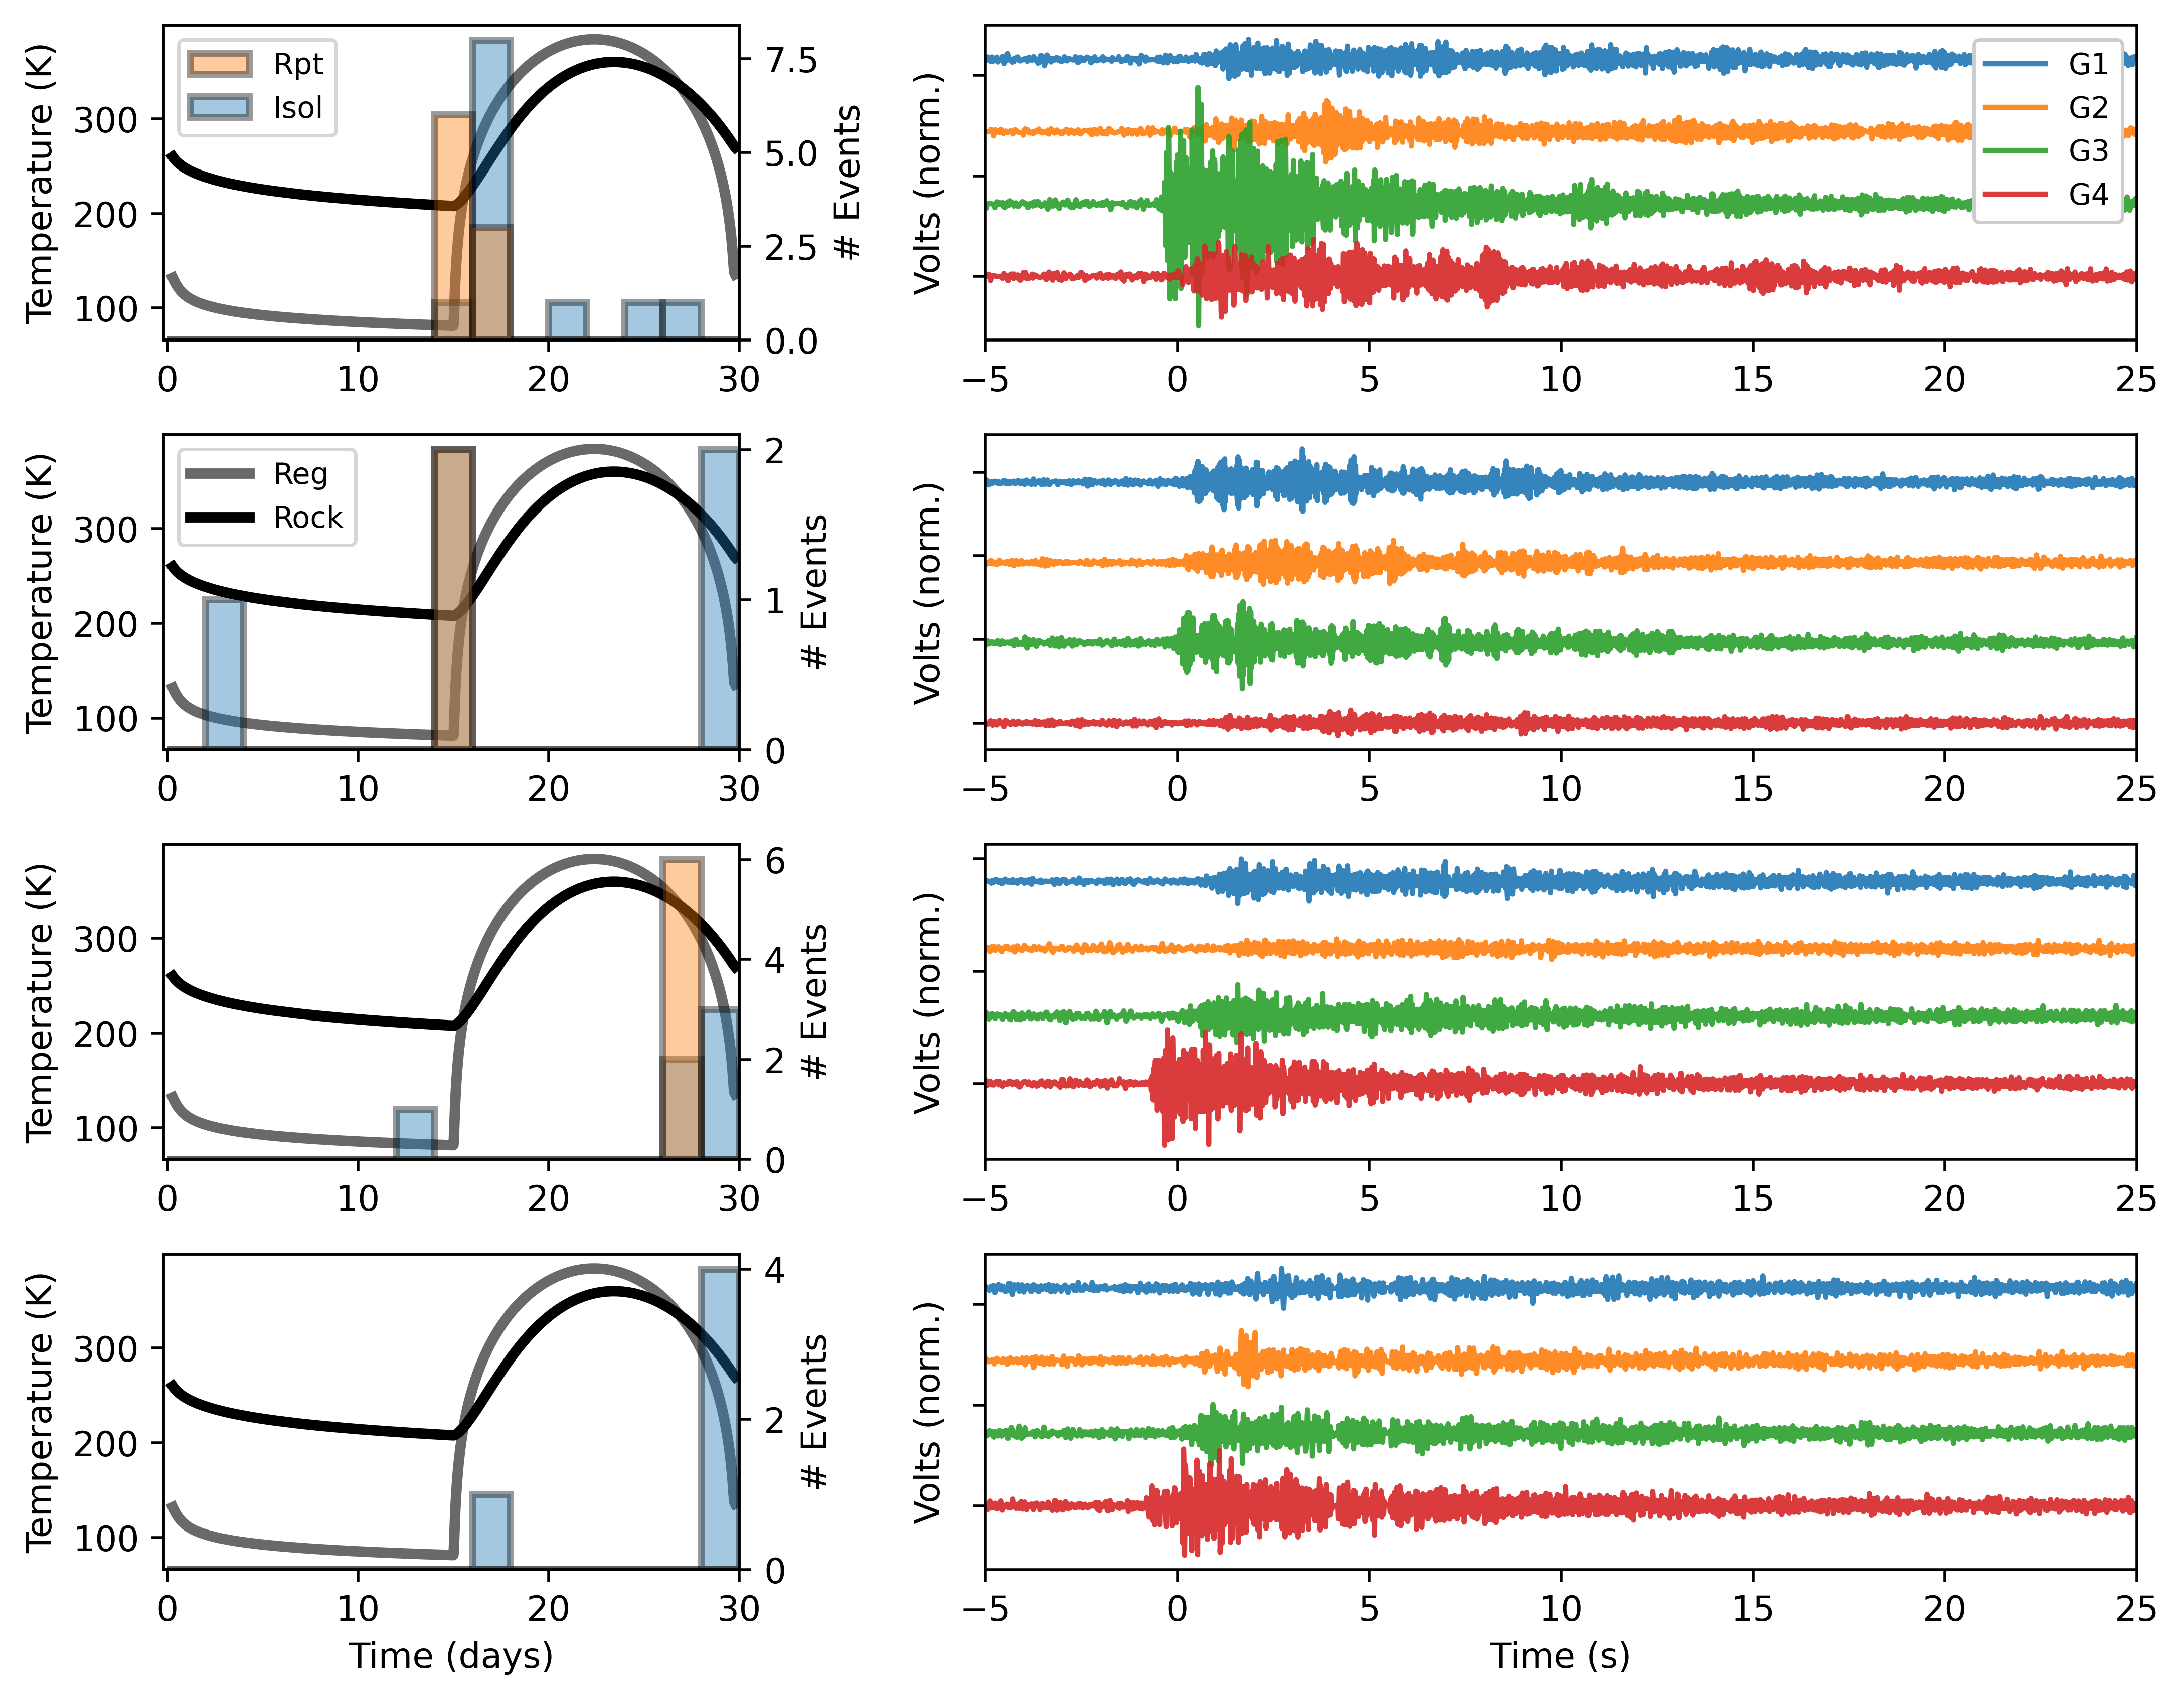

In [18]:
### Initialize figure
fig = plt.figure(figsize=(10., 8.), dpi=500)
gs = gridspec.GridSpec(4, 2, width_ratios=(1, 2)) 

### Geophone Rock
# Temperatures
ax_temp_georock = fig.add_subplot(gs[0,0])
ax_temp_georock.plot(times_day, reg_temps_day, color='dimgrey',label='Reg',linewidth=3)
ax_temp_georock.plot(times_day, rock_temps_day, color='black',label='Rock',linewidth=3)
ax_temp_georock.set_xlim([-0.2,30])
ax_temp_georock.tick_params(axis='both',labelsize=10)
ax_temp_georock.set_ylabel('Temperature (K)',fontsize=10)
ax_temp2_georock = ax_temp_georock.twinx()
bins = np.arange(0,31,2)
ax_temp2_georock.hist(intdays_georock_isol,alpha=0.4,edgecolor='black',linewidth=2,color='C0',bins=bins,label='Isol')
ax_temp2_georock.hist(intdays_georock_rpt,alpha=0.4,edgecolor='black',linewidth=2,color='C1',bins=bins,label='Rpt')
hist1 = ax_temp2_georock.get_children()[0]
hist2 = ax_temp2_georock.get_children()[-11]
ax_temp2_georock.set_ylabel('# Events',fontsize=10)
ax_temp2_georock.legend([hist2, hist1],['Rpt', 'Isol'],fontsize=8.5,loc='upper left')

# Waveforms
ax_wave_georock = fig.add_subplot(gs[0,1])
dist = 3.
ax_wave_georock.plot(trtimes1_georock,trdata1_norm_georock + 3.6*dist,color='C0',label=f'G1',alpha=0.9)
ax_wave_georock.set_xlim([-1*befwin,aftwin])
ax_wave_georock.set_ylabel('Volts (norm.)',fontsize=10)
ax_wave_georock.tick_params(axis='both',labelsize=10)
ax_wave_georock.set_yticklabels([])
ax_wave_georock.plot(trtimes2_georock,trdata2_norm_georock + 2.4*dist,color='C1',label=f'G2',alpha=0.9)
ax_wave_georock.plot(trtimes3_georock,trdata3_norm_georock + 1.2*dist,color='C2',label=f'G3',alpha=0.9)
ax_wave_georock.plot(trtimes4_georock,trdata4_norm_georock,color='C3',label=f'G4',alpha=0.9)
ax_wave_georock.legend(loc='upper right',framealpha=1,fontsize=8.5)


### R2 
# Temperatures
ax_temp_R2 = fig.add_subplot(gs[1,0])
ax_temp_R2.plot(times_day, reg_temps_day, color='dimgrey',label='Reg',linewidth=3)
ax_temp_R2.plot(times_day, rock_temps_day, color='black',label='Rock',linewidth=3)
ax_temp_R2.set_xlim([-0.2,30])
ax_temp_R2.tick_params(axis='both',labelsize=10)
ax_temp_R2.set_ylabel('Temperature (K)',fontsize=10)
ax_temp_R2.legend(loc='upper left',fontsize=8.5)
ax_temp2_R2 = ax_temp_R2.twinx()
bins = np.arange(0,31,2)
ax_temp2_R2.hist(intdays_R2_isol,alpha=0.4,edgecolor='black',linewidth=2,color='C0',bins=bins,label='Isol')
ax_temp2_R2.hist(intdays_R2_rpt,alpha=0.4,edgecolor='black',linewidth=2,color='C1',bins=bins,label='Rpt')
ax_temp2_R2.set_ylabel('# Events',fontsize=10)

# Waveforms
ax_wave_R2 = fig.add_subplot(gs[1,1])
dist = 2
ax_wave_R2.plot(trtimes1_R2,trdata1_norm_R2 + 3.6*dist,color='C0',label=f'G1',alpha=0.9)
ax_wave_R2.set_xlim([-1*befwin,aftwin])
ax_wave_R2.set_ylabel('Volts (norm.)',fontsize=10)
ax_wave_R2.tick_params(axis='both',labelsize=10)
ax_wave_R2.set_yticklabels([])
ax_wave_R2.plot(trtimes2_R2,trdata2_norm_R2 + 2.4*dist,color='C1',label=f'G2',alpha=0.9)
ax_wave_R2.plot(trtimes3_R2,trdata3_norm_R2 + 1.2*dist,color='C2',label=f'G3',alpha=0.9)
ax_wave_R2.plot(trtimes4_R2,trdata4_norm_R2,color='C3',label=f'G4',alpha=0.9)


### Geophone 4 Rock 1
# Temperatures
ax_temp_rock1 = fig.add_subplot(gs[2,0])
ax_temp_rock1.plot(times_day, reg_temps_day, color='dimgrey',label='Reg',linewidth=3)
ax_temp_rock1.plot(times_day, rock_temps_day, color='black',label='Rock',linewidth=3)
ax_temp_rock1.set_xlim([-0.2,30])
ax_temp_rock1.tick_params(axis='both',labelsize=10)
ax_temp_rock1.set_ylabel('Temperature (K)',fontsize=10)
# Plot temperature of moonquakes
ax_temp2_rock1 = ax_temp_rock1.twinx()
bins = np.arange(0,31,2)
ax_temp2_rock1.hist(intdays_rock1_isol,alpha=0.4,edgecolor='black',linewidth=2,color='C0',bins=bins,label='Isol')
ax_temp2_rock1.hist(intdays_rock1_rpt,alpha=0.4,edgecolor='black',linewidth=2,color='C1',bins=bins,label='Rpt')
ax_temp2_rock1.set_ylabel('# Events',fontsize=10)

# Waveforms
ax_wave_rock1 = fig.add_subplot(gs[2,1])
dist = 2
ax_wave_rock1.plot(trtimes1_rock1,trdata1_norm_rock1 + 4.5*dist,color='C0',label=f'G1',alpha=0.9)
ax_wave_rock1.set_xlim([-1*befwin,aftwin])
ax_wave_rock1.set_ylabel('Volts (norm.)',fontsize=10)
ax_wave_rock1.tick_params(axis='both',labelsize=10)
ax_wave_rock1.set_yticklabels([])
ax_wave_rock1.plot(trtimes2_rock1,trdata2_norm_rock1 + 3*dist,color='C1',label=f'G2',alpha=0.9)
ax_wave_rock1.plot(trtimes3_rock1,trdata3_norm_rock1 + 1.5*dist,color='C2',label=f'G3',alpha=0.9)
ax_wave_rock1.plot(trtimes4_rock1,trdata4_norm_rock1,color='C3',label=f'G4',alpha=0.9)


### Geophone 4 Rock 2/3
# Temperatures
ax_temp_rock23 = fig.add_subplot(gs[3,0])
ax_temp_rock23.plot(times_day, reg_temps_day, color='dimgrey',label='Reg',linewidth=3)
ax_temp_rock23.plot(times_day, rock_temps_day, color='black',label='Rock',linewidth=3)
ax_temp_rock23.set_xlim([-0.2,30])
ax_temp_rock23.tick_params(axis='both',labelsize=10)
ax_temp_rock23.set_xlabel('Time (days)',fontsize=10)
ax_temp_rock23.set_ylabel('Temperature (K)',fontsize=10)
ax_temp2_rock23 = ax_temp_rock23.twinx()
bins = np.arange(0,31,2)
ax_temp2_rock23.hist(intdays_rock23_isol,alpha=0.4,edgecolor='black',linewidth=2,color='C0',bins=bins,label='Isol')
ax_temp2_rock23.hist(intdays_rock23_rpt,alpha=0.4,edgecolor='black',linewidth=2,color='C1',bins=bins,label='Rpt')
ax_temp2_rock23.set_ylabel('# Events',fontsize=10)

# Waveforms
ax_wave_rock23 = fig.add_subplot(gs[3,1])
dist = 3
ax_wave_rock23.plot(trtimes1_rock23,trdata1_norm_rock23 + 3.6*dist,color='C0',label=f'G1',alpha=0.9)
ax_wave_rock23.set_xlim([-1*befwin,aftwin])
ax_wave_rock23.set_xlabel('Time (s)',fontsize=10)
ax_wave_rock23.set_ylabel('Volts (norm.)',fontsize=10)
ax_wave_rock23.tick_params(axis='both',labelsize=10)
ax_wave_rock23.set_yticklabels([])
ax_wave_rock23.plot(trtimes2_rock23,trdata2_norm_rock23 + 2.4*dist,color='C1',label=f'G2',alpha=0.9)
ax_wave_rock23.plot(trtimes3_rock23,trdata3_norm_rock23 + 1.2*dist,color='C2',label=f'G3',alpha=0.9)
ax_wave_rock23.plot(trtimes4_rock23,trdata4_norm_rock23,color='C3',label=f'G4',alpha=0.9)


### Adjust subplots
plt.subplots_adjust(wspace = 0.25, hspace = 0.3)
pos = ax_wave_georock.get_position()
pos = pos.bounds
pos_new = [pos[0]+0.012, pos[1], pos[2], pos[3]]
ax_wave_georock.set_position(pos_new)
pos = ax_wave_R2.get_position()
pos = pos.bounds
pos_new = [pos[0]+0.012, pos[1], pos[2], pos[3]]
ax_wave_R2.set_position(pos_new)
pos = ax_wave_rock1.get_position()
pos = pos.bounds
pos_new = [pos[0]+0.012, pos[1], pos[2], pos[3]]
ax_wave_rock1.set_position(pos_new)
pos = ax_wave_rock23.get_position()
pos = pos.bounds
pos_new = [pos[0]+0.012, pos[1], pos[2], pos[3]]
ax_wave_rock23.set_position(pos_new)